# Temporal search engine

## Histogram analysis

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Data
data = pd.read_csv("../data/data_hists.csv", delimiter=";")

problemes = np.unique(data[data.columns[0]])

In [3]:
# Selecting one time series
name = 'Problemes/Client mécontent/insatisfait'
ts = data[data[data.columns[0]] == name]
ts = ts.drop(ts.columns[0],1)
print(ts.shape)


def prtdt(l):
    return(str(l[2])+str(l[1])+str(l[0]))

ts['Date'] = ts['Date'].apply(lambda x: prtdt(x.split("/", 3)))

# Sorting according to date
ts.sort_values("Date", axis=0, ascending=True, inplace=True)

(2744, 2)


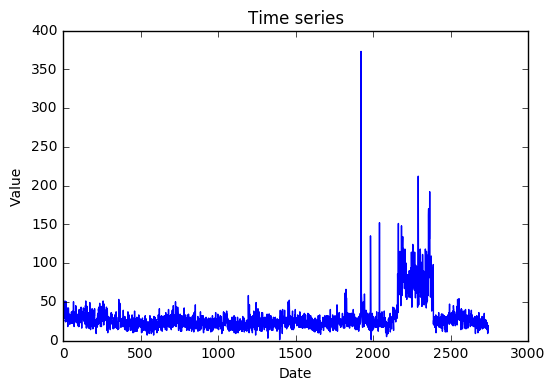

In [4]:
# Plot hist
fig = plt.figure()

a=fig.add_subplot(1,1,1)
a.plot(range(len(ts['Somme'])), ts['Somme'])
a.set_title("Time series")
a.set_xlabel("Date")
a.set_ylabel("Value")

plt.show()